In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\nikhi\OneDrive\Documents\Nikhil Masters files\University of Windsor\Interview prep\Pragra\Data Analytics Bootcamp\Netflix Data Analysis\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
df.shape

(6234, 12)

In [11]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [36]:
df['date_added']=pd.to_datetime(df['date_added'])

In [37]:
df.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [40]:
df['Year_Added']=df['date_added'].dt.year

In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_Added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0


In [23]:
percent_missing_director=((df['director'].isnull().sum())/(df.shape[0]))*100
percent_missing_cast=((df['cast'].isnull().sum())/(df.shape[0]))*100
percent_missing_country=((df['country'].isnull().sum())/(df.shape[0]))*100
percent_missing_date_added=((df['date_added'].isnull().sum())/(df.shape[0]))*100
percent_missing_rating=((df['rating'].isnull().sum())/(df.shape[0]))*100
print(percent_missing_director)
print(percent_missing_cast)
print(percent_missing_country)
print(percent_missing_date_added)
print(percent_missing_rating)

31.584857234520374
9.143407122232915
7.635547000320821
0.17645171639396856
0.16041065126724416


In [59]:
df.loc[df.isnull().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_Added
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017.0
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN


As there is significant information associated with these rows which contain missing values, we keep these records as is. We cannot perform imputation techniques as the missing values are shighly specific.

# Insight 1: Total Movies and TV shows by the year added

In [68]:
year_movies_and_tvshows_added=df.groupby(['Year_Added'])['Year_Added'].count().sort_values(ascending=False)

In [69]:
year_movies_and_tvshows_added

Year_Added
2019.0    2349
2018.0    1782
2017.0    1300
2016.0     456
2020.0     184
2015.0      90
2014.0      25
2011.0      13
2013.0      12
2012.0       7
2008.0       2
2009.0       2
2010.0       1
Name: Year_Added, dtype: int64

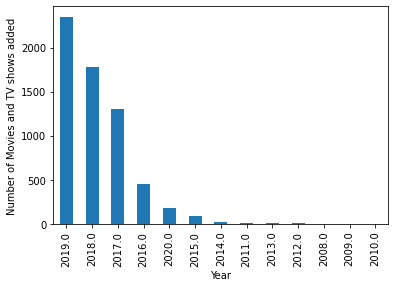

In [72]:
year_movies_and_tvshows_added.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies and TV shows added')
plt.show()

2019 saw the highest number of movies and TV shows being added

# Insight 2: Distribution between Movies and TV shows

In [76]:
distribution=df.groupby(['type'])['type'].count()
distribution

type
Movie      4265
TV Show    1969
Name: type, dtype: int64

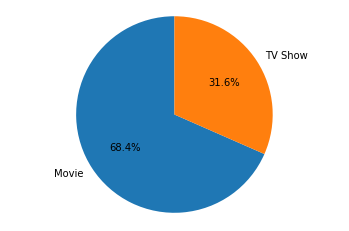

In [78]:
plt.pie(distribution,labels=distribution.index, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.show()

We see 68-32 split between the number of movies and TV shows

# Insight 3: Identify the top 10 genres

In [83]:
top10_genre=df.groupby(['listed_in'])['show_id'].count().sort_values(ascending=False).head(10)
top10_genre

listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: show_id, dtype: int64

Text(0, 0.5, 'Genre')

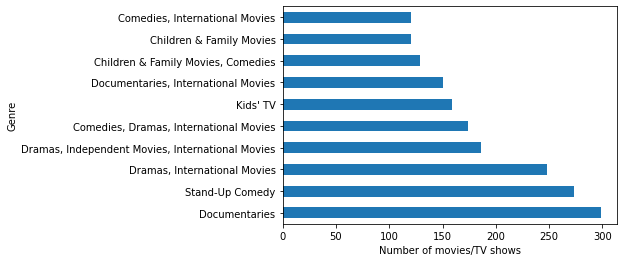

In [86]:
top10_genre.plot(kind='barh')
plt.xlabel('Number of movies/TV shows')
plt.ylabel('Genre')

Netflix seems to have a large collection of Documentaries

# Insight 4: Distribution of TV Shows/Movies by country

In [102]:
df['country'].value_counts().sort_values(ascending=False)

United States                            2032
India                                     777
United Kingdom                            348
Japan                                     176
Canada                                    141
                                         ... 
France, United Kingdom, United States       1
United States, France, Canada               1
Norway, United States                       1
United States, Mexico, Spain, Malta         1
Cyprus, Austria, Thailand                   1
Name: country, Length: 554, dtype: int64

An overwhelmingly high number of TV shows and Movies have originated out of ths US with Indian movies/TV shows coming a distinct second

# Insight 5: Identify the distribution of the censor board ratings

In [90]:
censor_ratings=df['rating'].value_counts()

In [91]:
censor_ratings

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

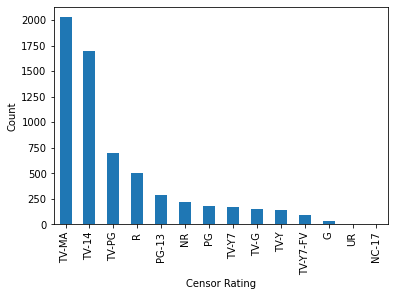

In [94]:
censor_ratings.plot(kind='bar')
plt.xlabel('Censor Rating')
plt.ylabel('Count')

We see most TV shows/movies have been listed as those suitable for 'Mature Audience'

# Insight 6: Which director had the most movies/TV shows?

In [96]:
df['director'].value_counts().head()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
Name: director, dtype: int64

The director duo of 'Raúl Campos, Jan Suter' have the most number of movies/TV shows listed in Netflix

# Insight 7: Did the director duo of 'Raúl Campos, Jan Suter' make movies/TV shows?

In [99]:
df.loc[df['director']=='Raúl Campos, Jan Suter']['type'].unique()

array(['Movie'], dtype=object)

'Raúl Campos, Jan Suter' only made movies atleast as far as the Netflix database was concerned

# Final Insights

1. 2019 saw the highest number of Movies & TV Shows being added to Netflix.
2. A '63-47' split has been seen between Movies and TV shows.
3. Documentaries seem to be the most popular genre.
4. The highest number of movies seem to be originating out of the United States.
5. A high proportion of the Movies and TV shows have been rated as TV-MA and TV-14 by the censor board.
6. The director duo of 'Raúl Campos, Jan Suter' had the most movies/TV shows.